**ECE401 DEV_LOG**</br>
accustic sensor array 

Needs:</br>
Mote capable of implementing a WSN</br>
    - First choise is nrf52840 SOC</br>

Tasks:</br>
Evaluate methos for programming nrf52840 with openWSN</br>
    - the DK board for the nrf SOC have a openWSN fork. However this board is overkill and too large.</br>
    - the seeed studio xiao nrf52840 would be a great form factor. However there is no known way to get openWSN loaded.</br>
    

Begining with a tutorial for the nrf52840_DK</br>
(https://atomic-hkust-gz.notion.site/Tutorial-Part-of-Course-IOTA5109-850468117de14a62870364efde1e7584)</br>

I set a goal to modify this work for the XIAO formfactor.</br>

The first problem in this goal is a need to fist a new method for programming the SOC. The segger IDE will not connect the the </br>XIAO board through the j-link feature. So I searched for a work around. I found some information about using the DK board </br>to debug an XIAO</br>
(https://www.ericbariaux.com/posts/xiao_nrf52840_swd/)</br>
and</br>
(https://wiki.seeedstudio.com/XIAO_BLE/#access-the-swd-pins-for-debugging-and-reflashing-bootloader)</br>

I plan to try and use both these sources to find a method to program the XIAO with the openWSN build intended for the DK board.</br>


From what I gather both solutions take advantage of the SWD pins that are broken out on the bottom of the PCB. I have connected some wires deadbug style to access these pins as shown below.</br>

![XIAO deadbug.jpg](<attachment:XIAO deadbug.jpg>)</br>

Yellow - SWCLK</br>
Blue - SWDIO</br>
Green - RST</br>
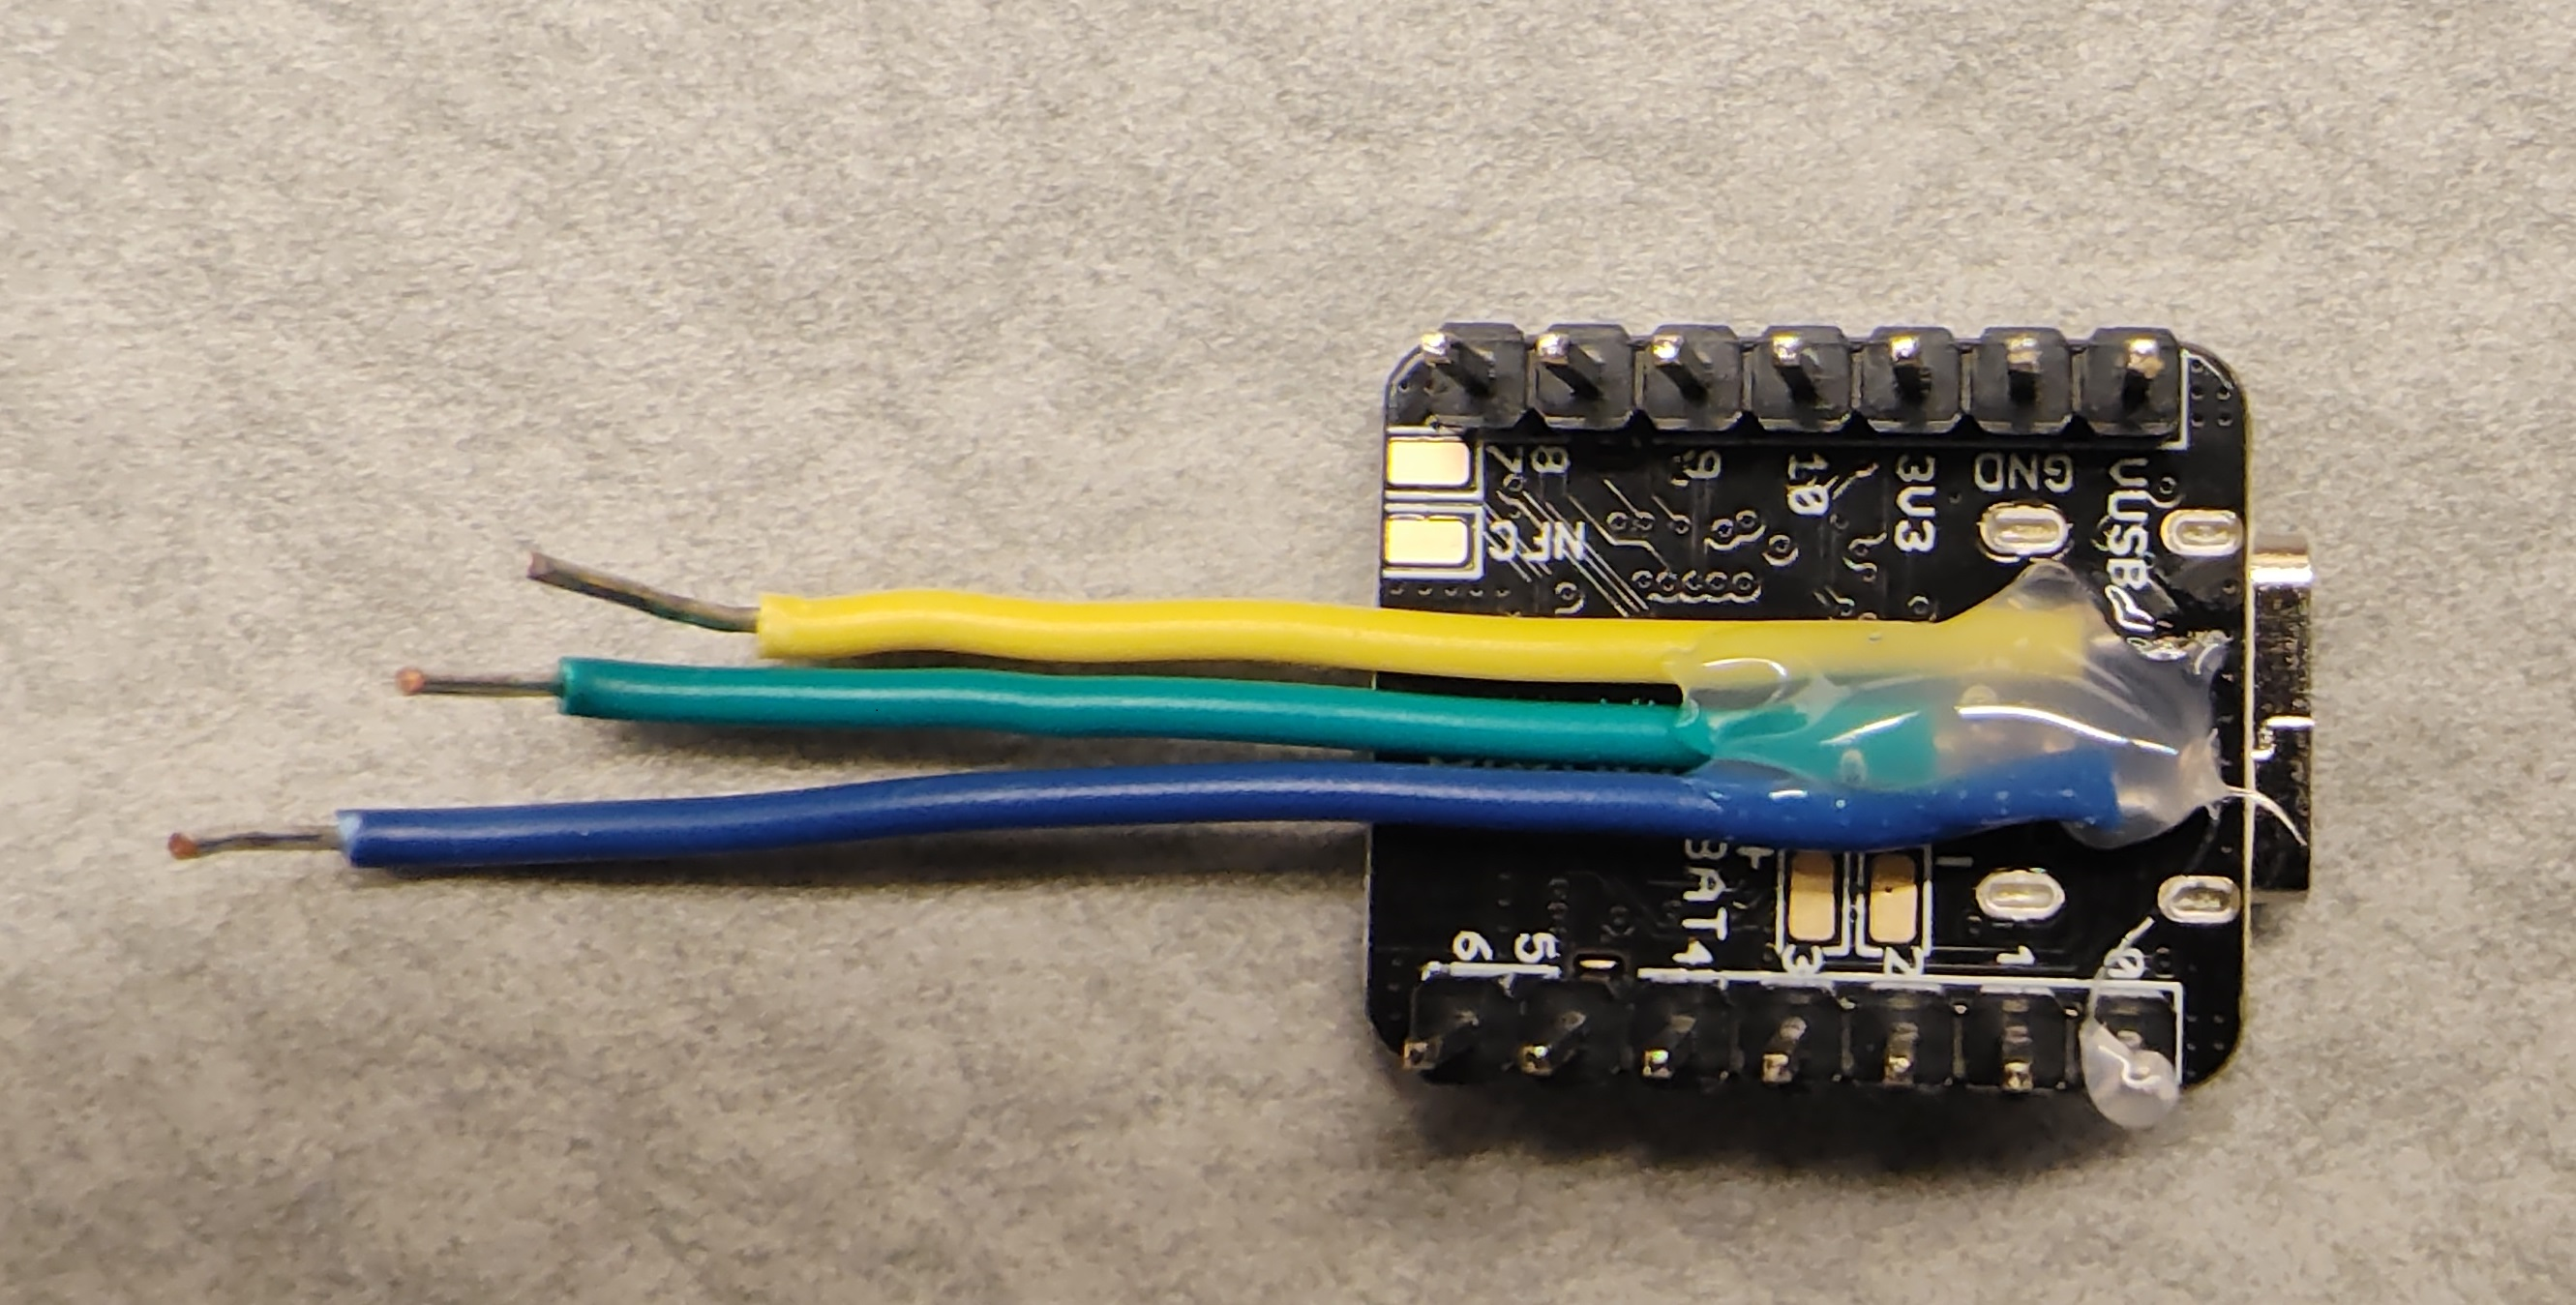

I then connected the XIAO to the DK board following the guide (https://www.ericbariaux.com/posts/xiao_nrf52840_swd/). As shown below, additionally in the image the XIAO user LED in illuminated. This was the result of writing the bsp_led project that was targeted at the DK board. I beleive this indicates I have successfully programmed the XIAO through the DK board. But firther verification will be needed and that comes next.

![DK to XIAO.jpg](<attachment:DK to XIAO.jpg>)


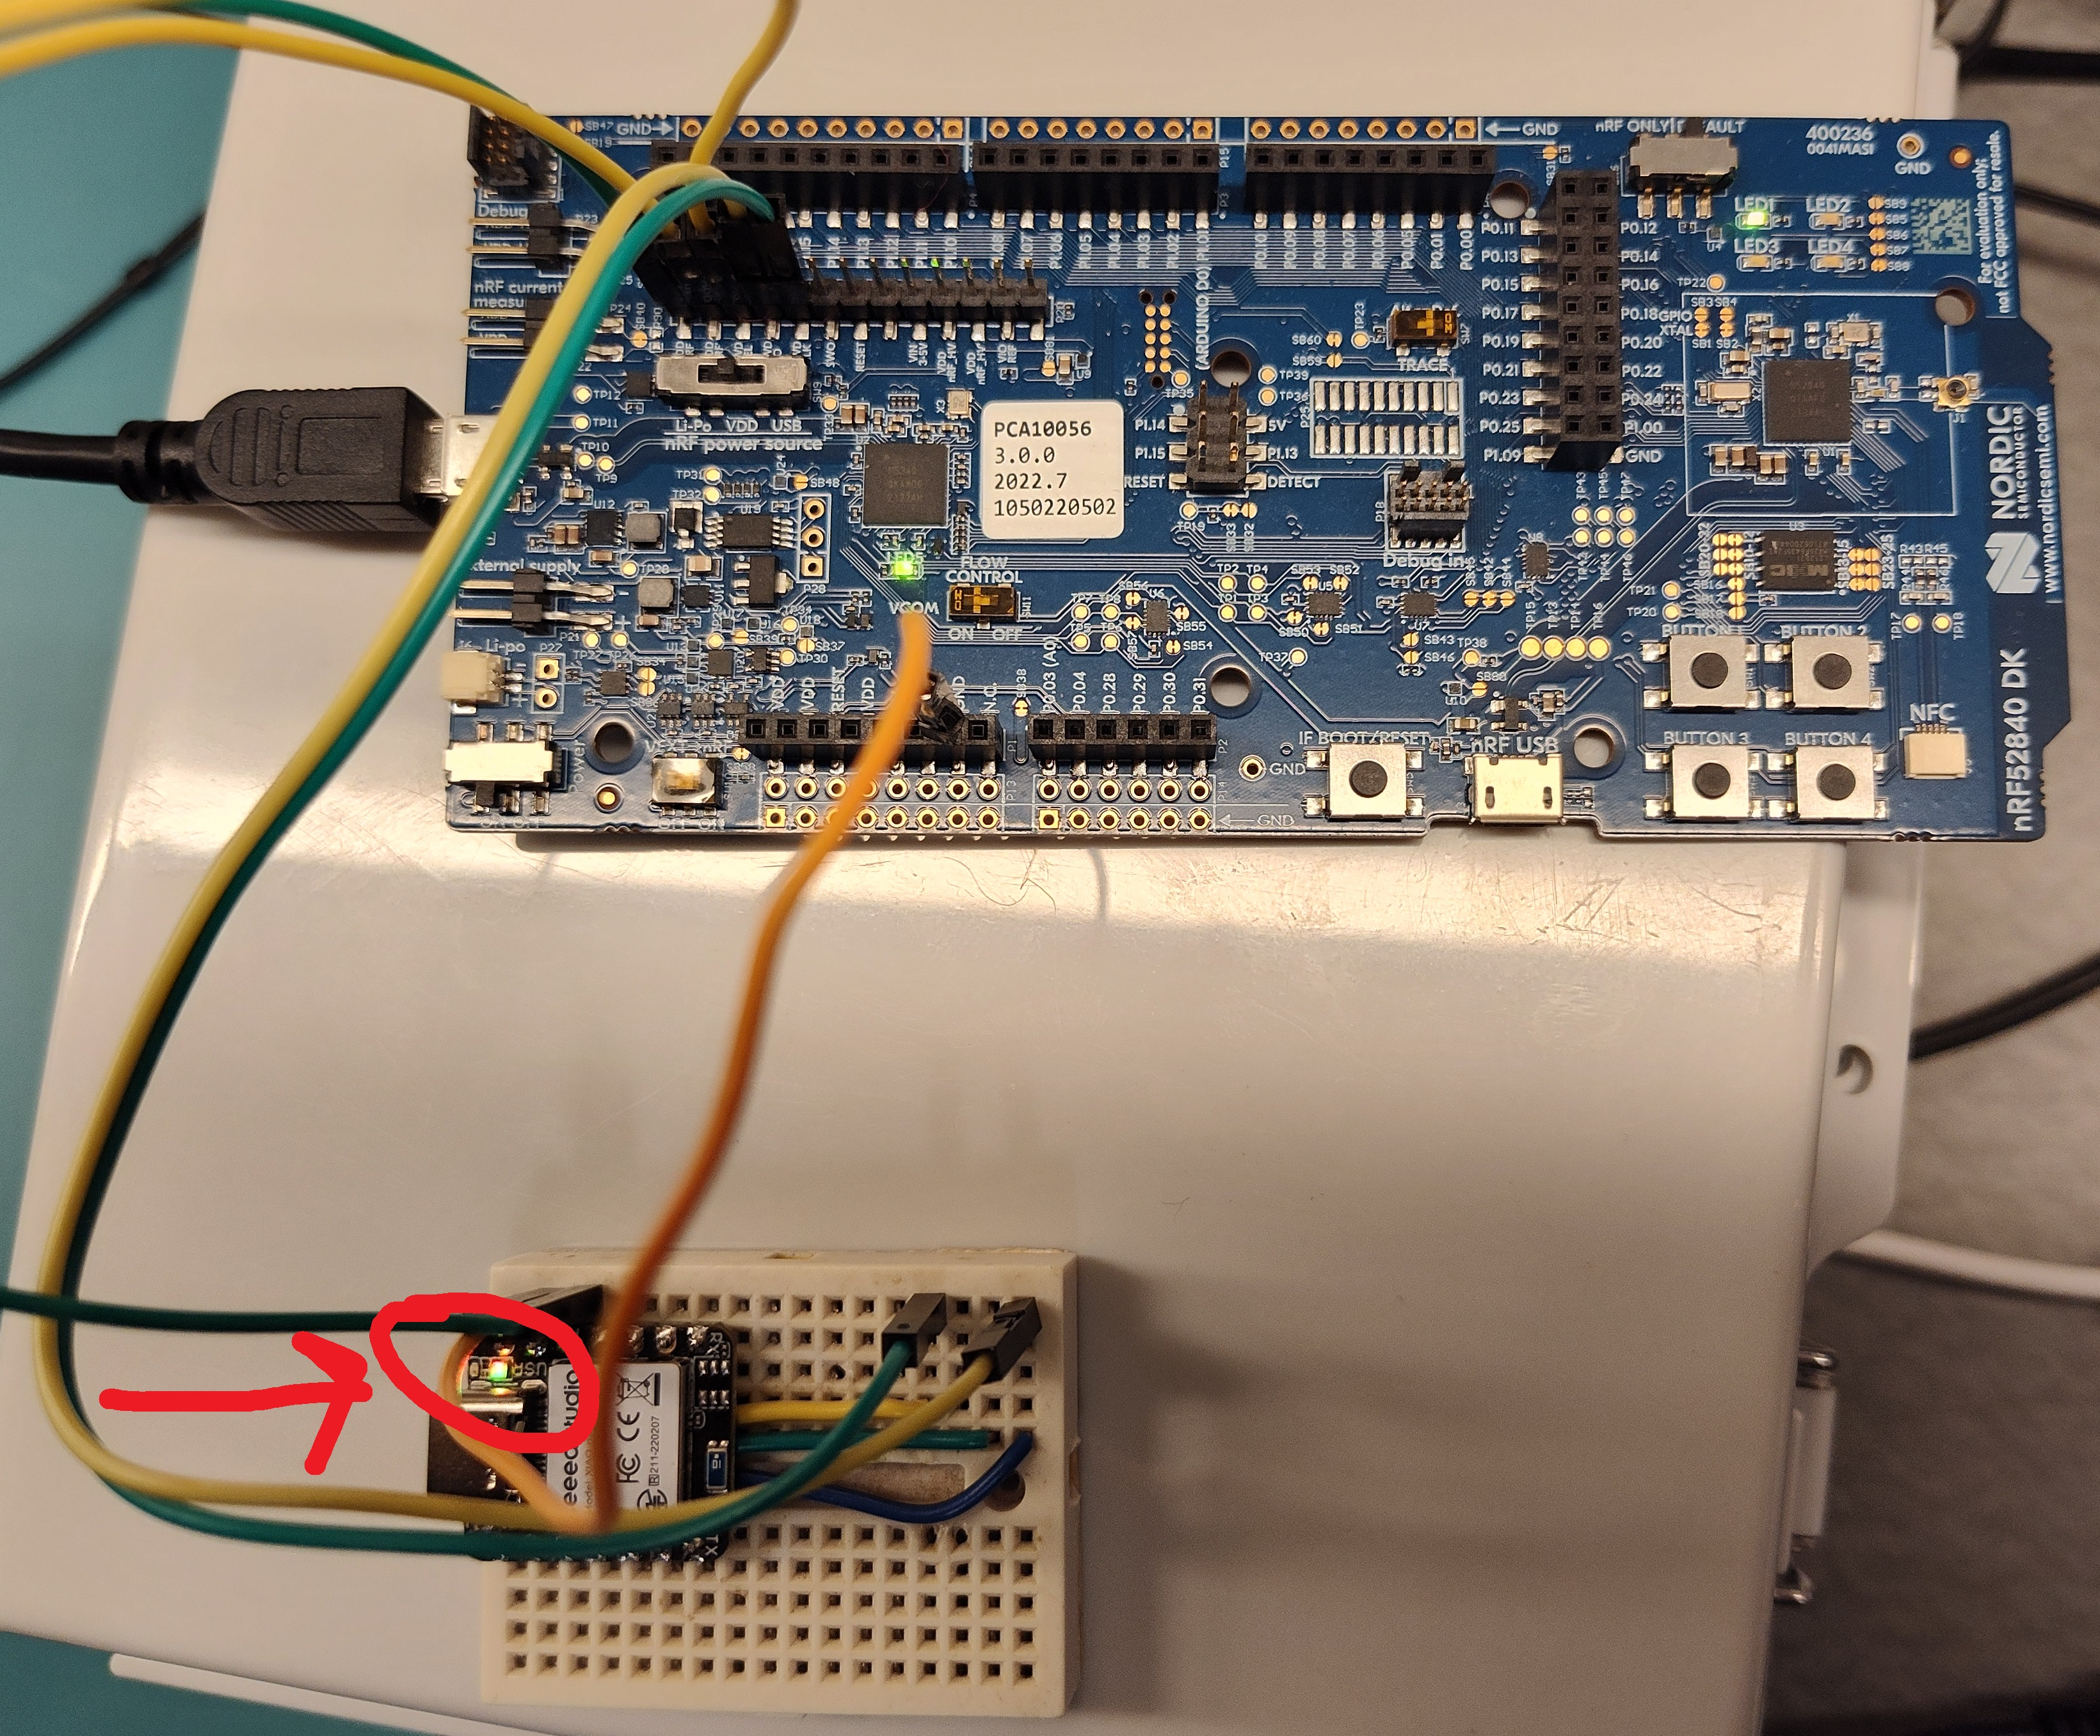

Some additional information about the XIAO board</br>
https://wiki.seeedstudio.com/XIAO_BLE/#access-the-swd-pins-for-debugging-and-reflashing-bootloader</br>

Next I wanted to verify the UART was working as this would be needed to proceed with the openWSN work.</br>
I flashed the usb test project using the same method as with the LED test. After completeing I connected the XIAO to my PC via its usb port. The XIAO was not listing as a COM port and due to this I was unable to connect via putty.</br>

Next the RX/TX pins that the XIAO breaks out. This required modifying the pin definitions in uart.c. I set the TX pin to port 1 pin 11 </br>
#define UART_TX_PIN       NRF_GPIO_PIN_MAP(1,11)</br>
#define UART_TX_PIN       NRF_GPIO_PIN_MAP(1,11)</br>

I then connected a TTL UART dongle to the TX pin. This successfully receivece the hello world message.</br>

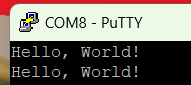

![XIAO to TTL.jpg](<attachment:XIAO to TTL.jpg>)
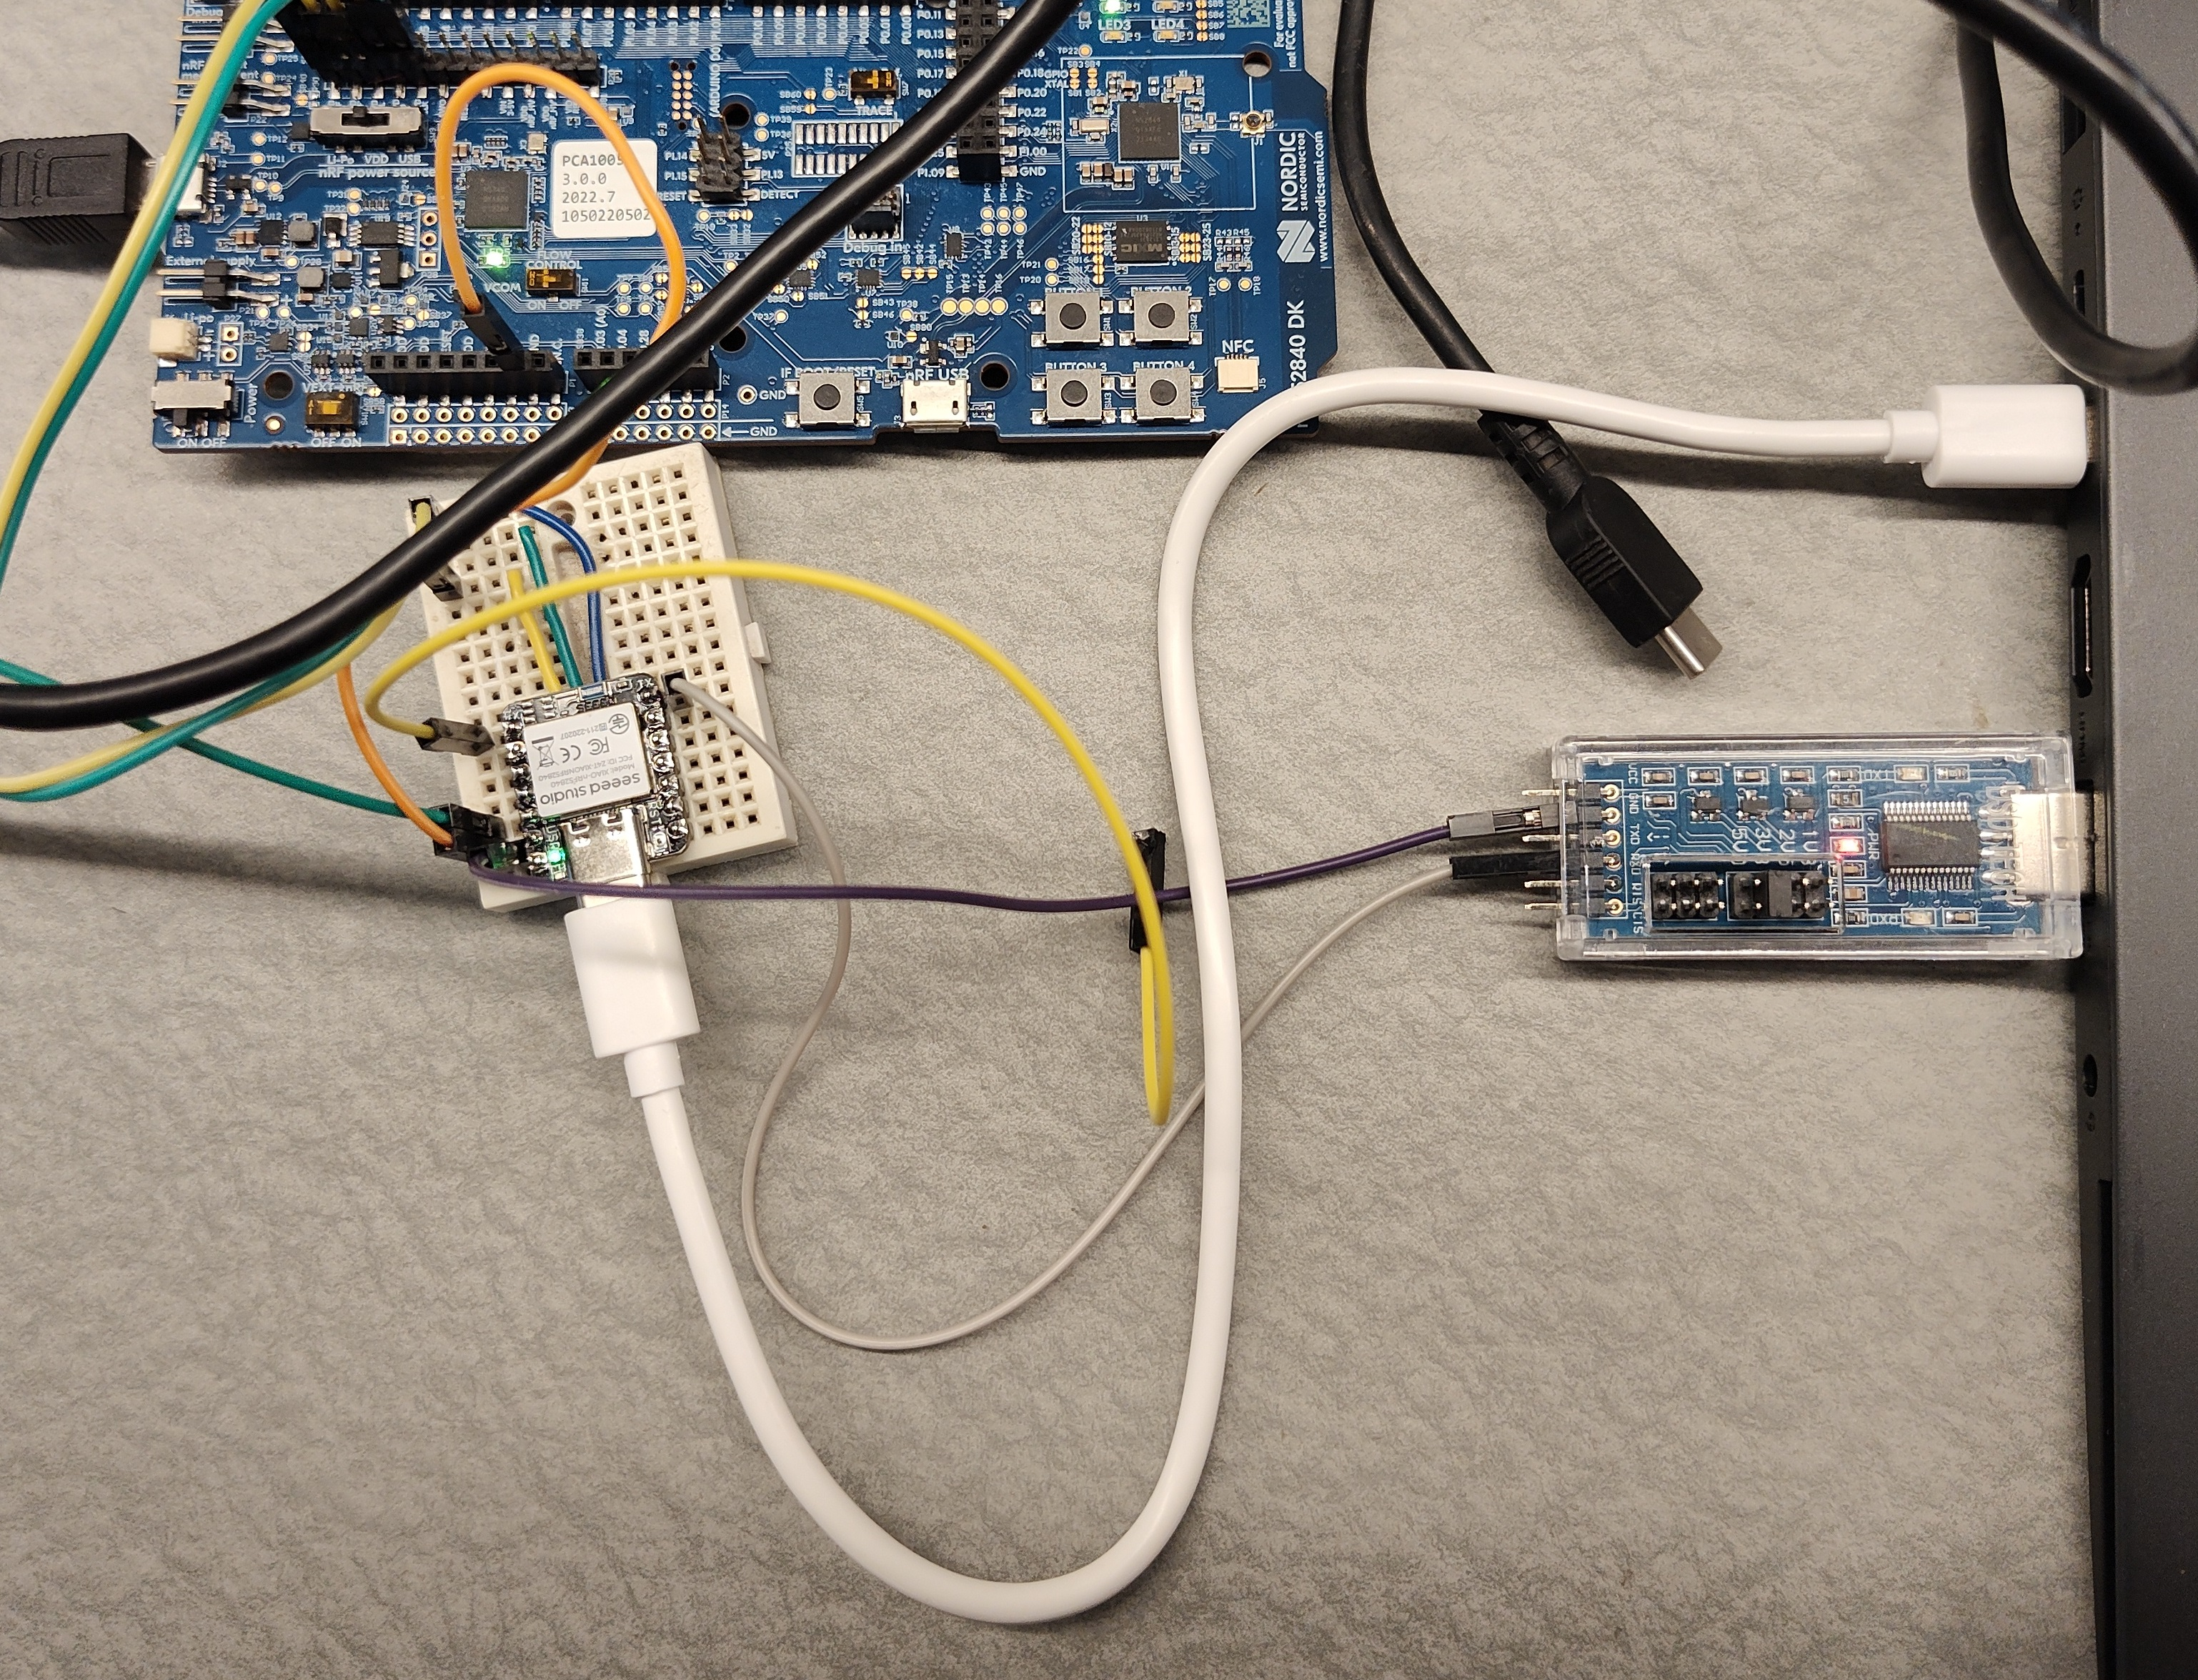

***Next goal is to get openWSN up and running.***

First configure the led driver in ./bsp/led.c </br>
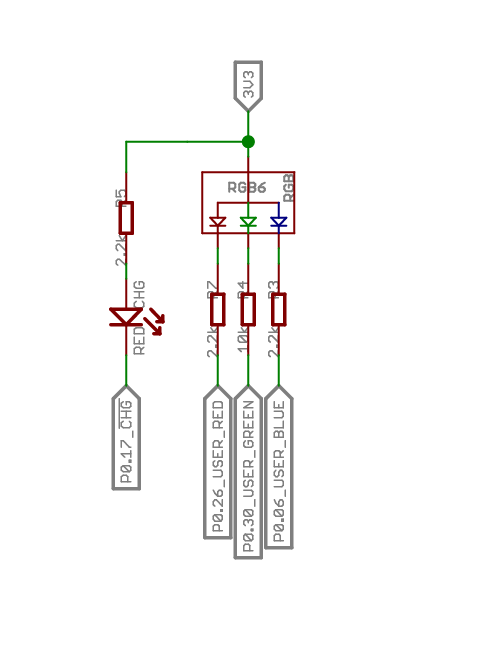 </br>
https://files.seeedstudio.com/wiki/XIAO-BLE/Seeed-Studio-XIAO-nRF52840-Sense-v1.1.pdf </br>
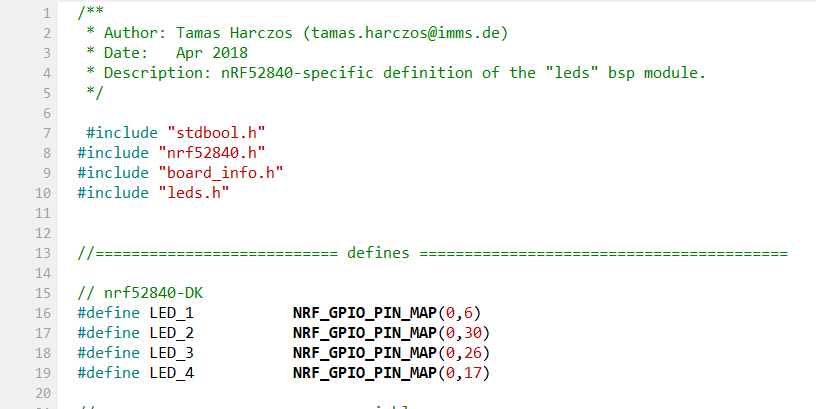 </br>


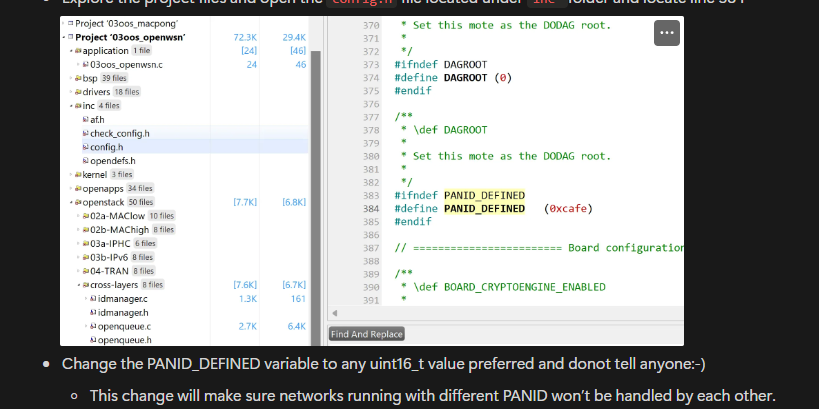 </br>
You can change this to form a unique network</br>

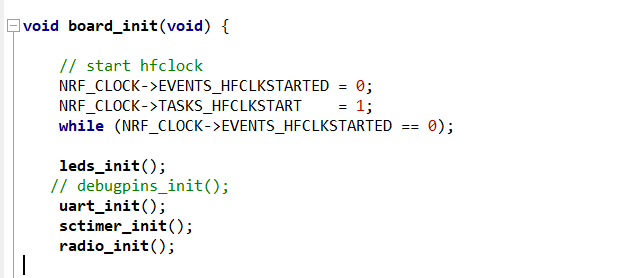</br>

Comment out debug pins or they will conflict with the LED pins. Or you can map the debug pins to other GPIO

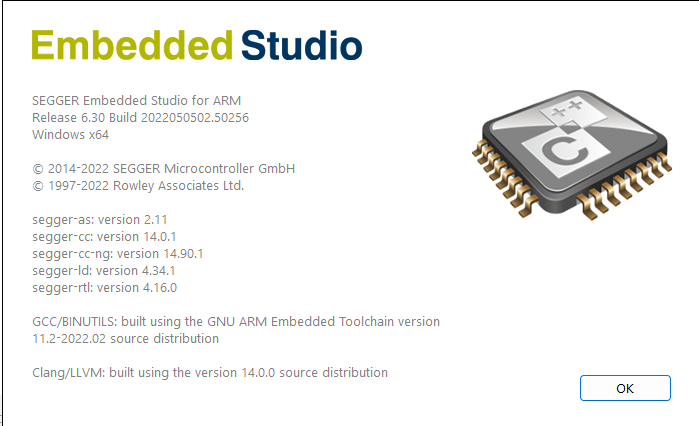

In openserial.c I hijack this function to call me routines to get data from openserial to uinject. 

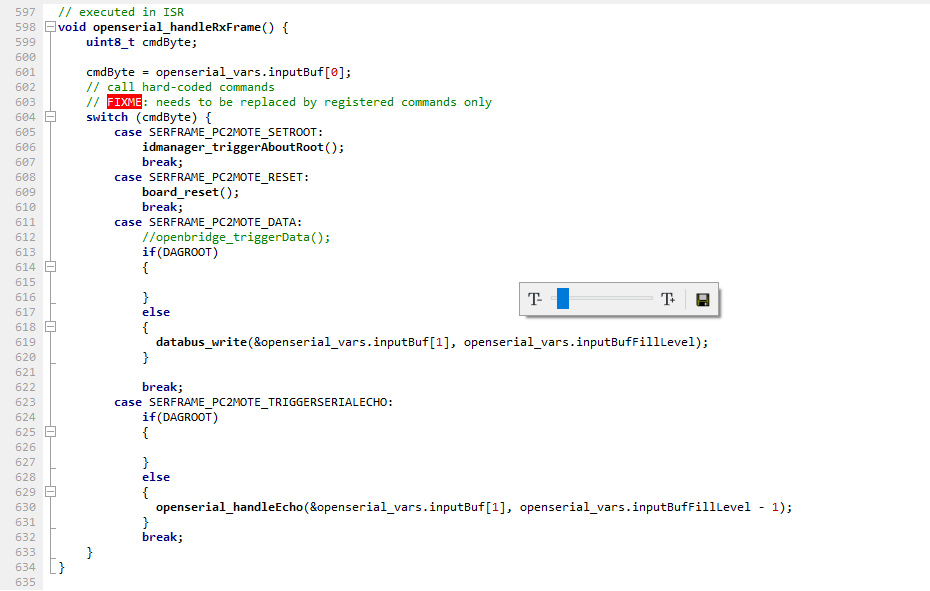

There is also logic to take different actions if root or a node

cmdByte is read from completed incoming uart messages, the codes are found in openserial.h

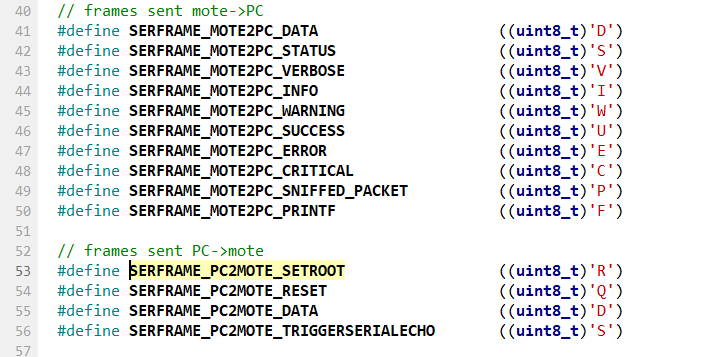

The above  openserial_handleRxFrame() is called only when the below function successfully builds an incomes uart message.

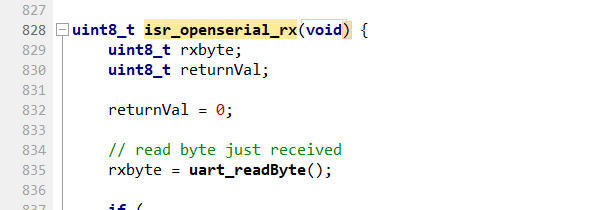

Complete message use these flag in openhdlc.c

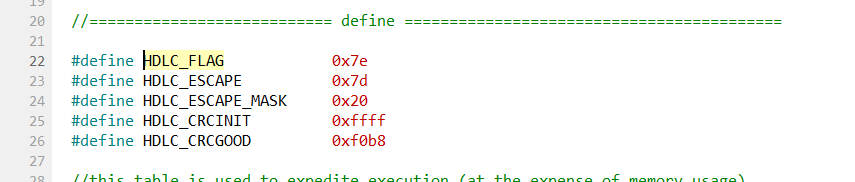